In [121]:
# Import the Required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.random.set_seed(5)

In [122]:
from keras.layers import Dense, Flatten, MaxPool2D, Conv2D ,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import EarlyStopping
import cv2
import os
import seaborn as sns

# Load The CIFAR10 Dataset

In [146]:
from tensorflow.keras.datasets import cifar10

In [124]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

In [125]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


# Preprocess the Data

In [126]:
X_train = X_train/255
X_test = X_test/255

In [127]:
batch_size = 32,
class_mode = 'categorical',
target_size = (32,32)

In [128]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [129]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [130]:
X_train.shape

(50000, 32, 32, 3)

In [131]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [132]:
X_train[0].shape

(32, 32, 3)

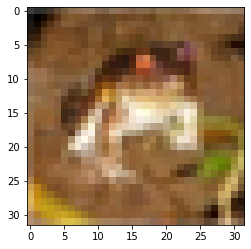

In [133]:
plt.imshow(X_train[0])

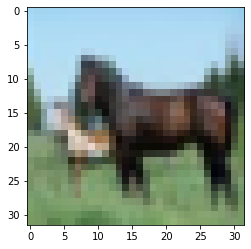

In [134]:
plt.imshow(X_train[12])

In [135]:
from keras.utils.np_utils import to_categorical
y_cat_train  = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

# Architecture of the CNN multiclass Model 

In [136]:
model = tf.keras.models.Sequential()

model.add(Conv2D(filters = 12, kernel_size = (3,3), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.Dropout(0.15))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06) ,loss = "categorical_crossentropy", metrics = ["accuracy"])

In [137]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 12)        336       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 12)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 12)        0         
                                                                 
 flatten_6 (Flatten)         (None, 2700)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               1382912   
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                      

In [138]:
mdl_history = model.fit(X_train, y_cat_train, validation_data = (X_test, y_cat_test), epochs = 30)

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7969 - accuracy: 0.3614 - val_loss: 1.6417 - val_accuracy: 0.4104
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5358 - accuracy: 0.4616 - val_loss: 1.4697 - val_accuracy: 0.4762
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4071 - accuracy: 0.5095 - val_loss: 1.3500 - val_accuracy: 0.5274
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3196 - accuracy: 0.5392 - val_loss: 1.2957 - val_accuracy: 0.5413
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2583 - accuracy: 0.5627 - val_loss: 1.2447 - val_accuracy: 0.5692
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2089 - accuracy: 0.5783 - val_loss: 1.2523 - val_accuracy: 0.5641
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1682 - accuracy: 0.5961 - val_loss: 1.1707 - val_accuracy:

# plot the Accuracy on Training and Testing Data - (Training - 70.83% and Testing 66.49%)

Text(0, 0.5, 'Accuracy')

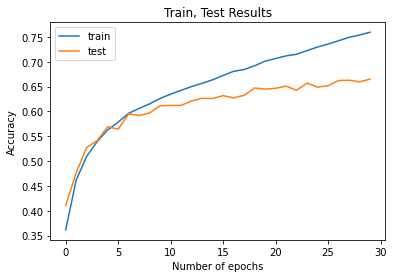

In [139]:
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
plt.legend(('train','test'),loc='best')
plt.title("Train, Test Results")
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

# CNN Multiclass Model Evaluation

In [140]:
test_loss, test_acc = model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9872 - accuracy: 0.6649


In [143]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_cat_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 1s 4ms/step


[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

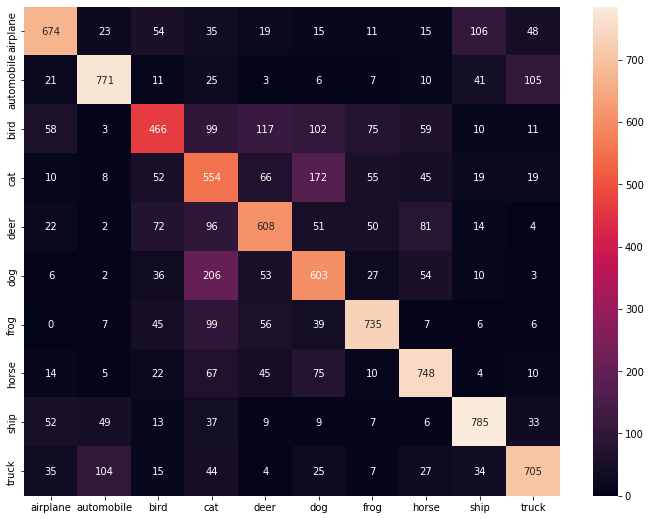

In [144]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)